In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [102]:

excelFile = pd.read_excel("/content/QVI_transaction_data.xlsx")

excelFile.to_csv("QVI_transaction_data.csv", index=None, header=True)

In [103]:
Transaction = pd.read_csv("/content/QVI_transaction_data.csv")

In [104]:
Purchase = pd.read_csv("/content/QVI_purchase_behaviour.csv")

In [105]:
df=Transaction.join(Purchase.set_index('LYLTY_CARD_NBR'),on='LYLTY_CARD_NBR')
df.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
73460,43616,94,94151,93415,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,OLDER FAMILIES,Premium
8196,43409,68,68046,65400,99,Pringles Sthrn FriedChicken 134g,2,7.4,MIDAGE SINGLES/COUPLES,Mainstream
232271,43418,103,103083,103160,76,Woolworths Medium Salsa 300g,1,1.5,YOUNG SINGLES/COUPLES,Budget
223890,43396,157,157165,159433,52,Grain Waves Sour Cream&Chives 210G,2,7.2,YOUNG FAMILIES,Premium
248929,43293,141,141226,142470,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream


In [106]:
df1 = df.copy()

In [107]:
df1['DATE'] = pd.to_datetime(df1['DATE']- 2, origin='1899-12-30', unit='D')

In [108]:
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-15,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-12,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-18,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-15,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-16,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-07,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-11,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-04,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-25,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


<Axes: >

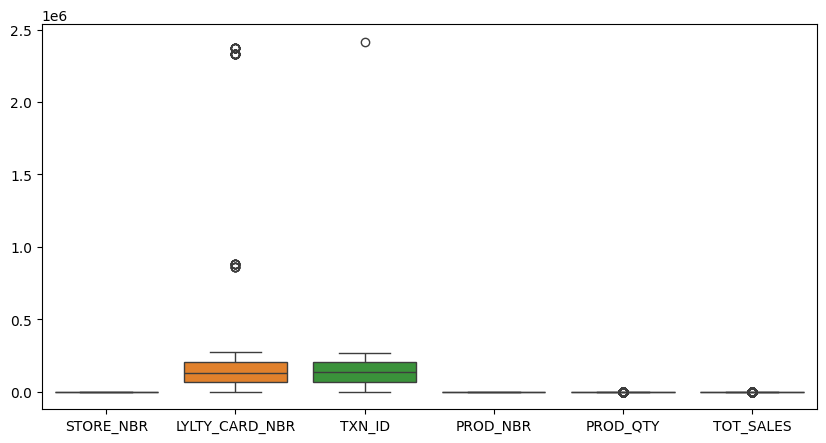

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(df1)

<Axes: ylabel='PROD_QTY'>

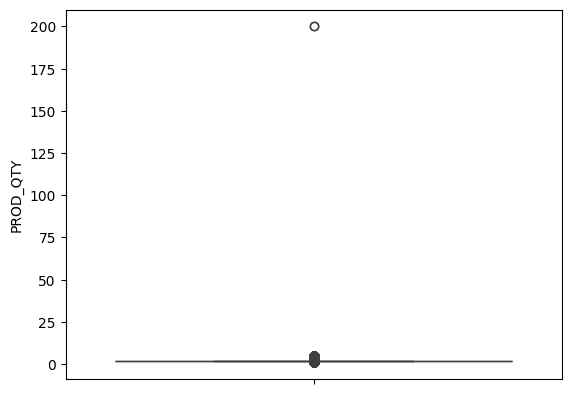

In [111]:
sns.boxplot(df1['PROD_QTY'])

In [112]:
df1['BRAND'] = df1['PROD_NAME'].str.split().str[0]

In [113]:
df1['BRAND']

,BRAND
0,Natural
1,CCs
2,Smiths
3,Smiths
4,Kettle
...,...
264831,Kettle
264832,Tostitos
264833,Doritos
264834,Doritos


In [114]:
df1['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [115]:
df1['BRAND']=df1['BRAND'].replace({'Dorito':'Doritos'})

In [116]:
df1['PKT_SIZE'] = df1['PROD_NAME'].str.extract(r'(\d+[gG])')

In [117]:
df1['PKT_SIZE']

,PKT_SIZE
0,175g
1,175g
2,170g
3,175g
4,150g
...,...
264831,175g
264832,175g
264833,170g
264834,150g


In [118]:
df1['PKT_SIZE'].value_counts()

,count
PKT_SIZE,
175g,64929
150g,41633
134g,25102
110g,22387
170g,19983
165g,15297
300g,15166
330g,12540
380g,6418


In [119]:
from collections import Counter
count=Counter()
for x in df1['PROD_NAME'].str.split(" "):
    for counter in x:
        count[counter]+=1
count

Counter({'Natural': 6050,
         'Chip': 18645,
         '': 504838,
         'Compny': 1468,
         'SeaSalt175g': 1468,
         'CCs': 4551,
         'Nacho': 4658,
         'Cheese': 27890,
         '175g': 60561,
         'Smiths': 28860,
         'Crinkle': 23960,
         'Cut': 20754,
         'Chips': 49770,
         'Chicken': 15407,
         '170g': 18502,
         'Thinly': 7507,
         'S/Cream&Onion': 1473,
         'Kettle': 41288,
         'Tortilla': 9580,
         'ChpsHny&Jlpno': 3296,
         'Chili': 3296,
         '150g': 41633,
         'Old': 9324,
         'El': 9324,
         'Paso': 9324,
         'Salsa': 18094,
         'Dip': 9324,
         'Tomato': 7669,
         'Mild': 6048,
         '300g': 12041,
         'Salt': 27976,
         '&': 35565,
         'Vinegar': 12402,
         '330g': 12540,
         'Grain': 6272,
         'Waves': 6272,
         'Sweet': 7883,
         'Chilli': 12389,
         '210g': 3167,
         'Doritos': 24962,
       

In [120]:
Chips=df1[df1['PROD_NAME'].str.contains(r'Chips|Chip|Chp')]

In [121]:
Chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PKT_SIZE
0,2018-10-15,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
2,2019-05-18,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170g
3,2018-08-15,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,Smiths,175g
4,2018-08-16,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,Kettle,150g
6,2019-05-14,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,330g
...,...,...,...,...,...,...,...,...,...,...,...,...
264816,2019-05-27,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium,Cobs,110g
264824,2019-03-11,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,YOUNG SINGLES/COUPLES,Premium,Kettle,150g
264826,2019-03-23,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium,Cobs,110g
264830,2018-11-10,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium,Thins,175g


In [122]:
Chips.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,87335,87335.000000,8.733500e+04,87335.000000,87335.000000,87335.000000,87335.000000
mean,2018-12-27 21:06:07.893742336,135.525185,1.360239e+05,135604.567127,49.949619,1.910620,7.286420
min,2018-06-29 00:00:00,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,2018-09-28 00:00:00,70.000000,7.010000e+04,68056.500000,16.000000,2.000000,6.000000
50%,2018-12-27 00:00:00,131.000000,1.314830e+05,135822.000000,42.000000,2.000000,6.600000
75%,2019-03-29 00:00:00,203.000000,2.032830e+05,203488.000000,78.000000,2.000000,8.800000
max,2019-06-28 00:00:00,272.000000,2.373711e+06,270209.000000,111.000000,200.000000,650.000000
std,NaN,76.853472,8.095134e+04,78071.398801,34.450103,1.007451,3.943887


In [123]:
Chips.PREMIUM_CUSTOMER.value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,33671
Budget,30772
Premium,22892


In [124]:
Chips.LIFESTAGE.value_counts()

,count
LIFESTAGE,
OLDER SINGLES/COUPLES,18043
RETIREES,16363
OLDER FAMILIES,15896
YOUNG FAMILIES,14391
YOUNG SINGLES/COUPLES,12026
MIDAGE SINGLES/COUPLES,8335
NEW FAMILIES,2281


In [125]:
total_sales=Chips.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_sales

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,222228.55
Mainstream,247492.50
Premium,166638.45


Text(0.5, 1.0, 'TOTAL SALES BY PREMIUM CUSTOMERS')

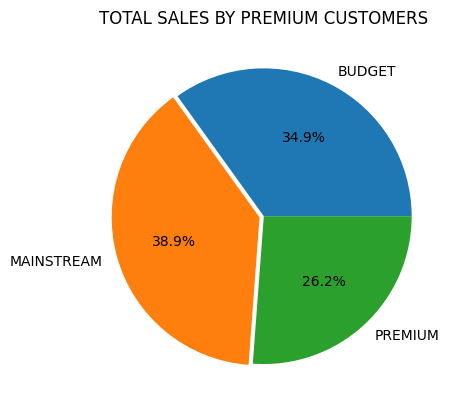

In [126]:
plt.pie(total_sales,labels=['BUDGET','MAINSTREAM','PREMIUM'],explode=[0,0.03,0],autopct='%1.1f%%')
plt.title('TOTAL SALES BY PREMIUM CUSTOMERS')

In [127]:
avg_sales_by_premium_customer=Chips.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].mean()
median_sale_by_premium_customer=Chips.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].median()

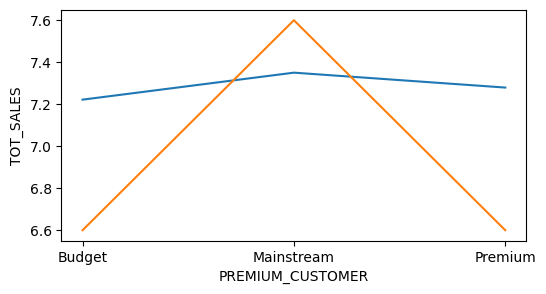

In [128]:
plt.figure(figsize=(6,3))
a=sns.lineplot(avg_sales_by_premium_customer)
b=sns.lineplot(median_sale_by_premium_customer)

In [129]:
sales_by_lifestage=Chips.groupby(['LIFESTAGE'])['TOT_SALES'].sum()
sales_by_lifestage

,TOT_SALES
LIFESTAGE,
MIDAGE SINGLES/COUPLES,61000.20
NEW FAMILIES,16457.55
OLDER FAMILIES,116669.60
OLDER SINGLES/COUPLES,132464.35
RETIREES,119553.70
YOUNG FAMILIES,104437.90
YOUNG SINGLES/COUPLES,85776.20


<Axes: xlabel='LIFESTAGE'>

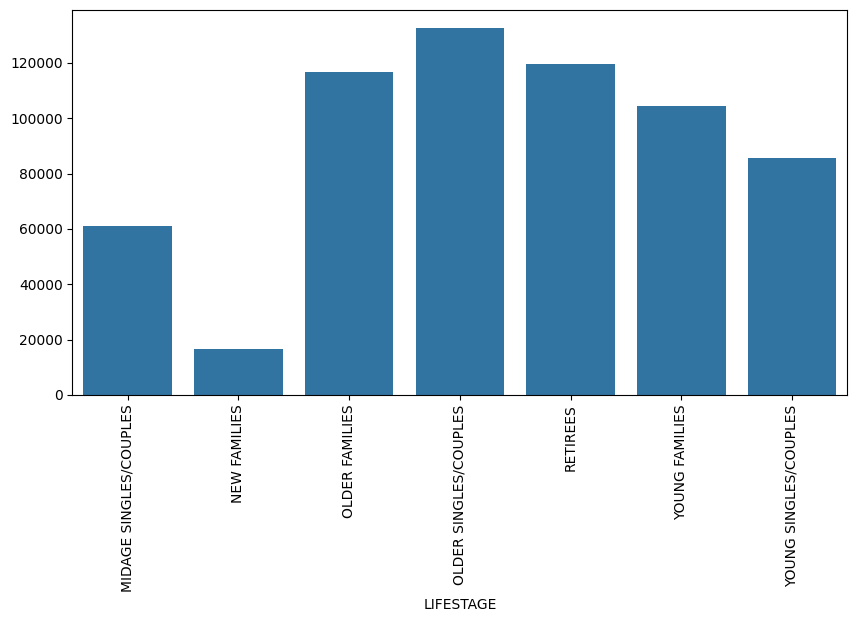

In [130]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=sales_by_lifestage.index,y=sales_by_lifestage.values)

In [131]:
total_sales=Chips.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].sum()
total_sales.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            54808.85
Mainstream        YOUNG SINGLES/COUPLES     51434.40
                  RETIREES                  50673.45
Budget            YOUNG FAMILIES            45626.85
                  OLDER SINGLES/COUPLES     44910.30
Mainstream        OLDER SINGLES/COUPLES     44114.10
Premium           OLDER SINGLES/COUPLES     43439.95
Budget            RETIREES                  37417.30
Mainstream        OLDER FAMILIES            34709.75
Premium           RETIREES                  31462.95
Mainstream        YOUNG FAMILIES            30941.65
                  MIDAGE SINGLES/COUPLES    29978.75
Premium           YOUNG FAMILIES            27869.40
                  OLDER FAMILIES            27151.00
Budget            YOUNG SINGLES/COUPLES     20277.40
Premium           MIDAGE SINGLES/COUPLES    18930.65
                  YOUNG SINGLES/COUPLES     14064.40
Budget            MIDAGE SINGLES/COUPLES    12090.80
                  NEW FAMILIES               7097.05
Mainstream        NEW FAMILIES               5640.40
Premium           NEW FAMILIES               3720.10
Name: TOT_SALES, dtype: float64

<Axes: xlabel='LIFESTAGE'>

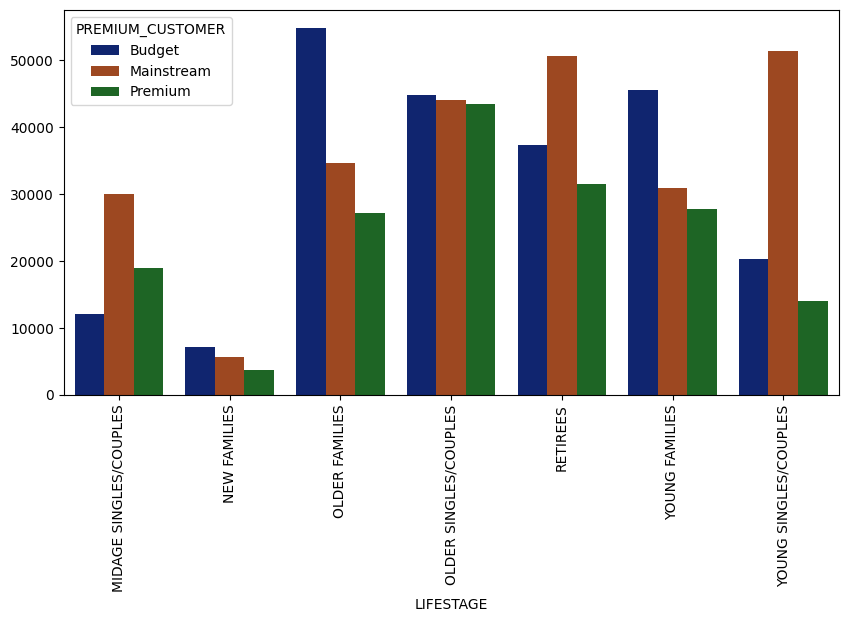

In [132]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=total_sales.index.get_level_values('LIFESTAGE'),
              y=total_sales.values,
              hue=total_sales.index.get_level_values('PREMIUM_CUSTOMER'),
              palette='dark')

In [133]:
Quantity = Chips.groupby(['PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

In [134]:
Quantity

,PROD_QTY
PREMIUM_CUSTOMER,
Budget,58728
Mainstream,64120
Premium,44016


In [135]:
quantity_premium_lifestage=Chips.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].sum()
quantity_premium_lifestage.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            14673
Mainstream        RETIREES                  13218
                  YOUNG SINGLES/COUPLES     12703
Budget            YOUNG FAMILIES            12163
                  OLDER SINGLES/COUPLES     11651
Mainstream        OLDER SINGLES/COUPLES     11582
Premium           OLDER SINGLES/COUPLES     11274
Budget            RETIREES                   9620
Mainstream        OLDER FAMILIES             9286
                  YOUNG FAMILIES             8300
Premium           RETIREES                   8066
Mainstream        MIDAGE SINGLES/COUPLES     7592
Premium           YOUNG FAMILIES             7426
                  OLDER FAMILIES             7408
Budget            YOUNG SINGLES/COUPLES      5546
Premium           MIDAGE SINGLES/COUPLES     5042
                  YOUNG SINGLES/COUPLES      3838
Budget            MIDAGE SINGLES/COUPLES     3240
                  NEW FAMILIES               1835
Mainstream        NEW FAMILIES               1439
Premium           NEW FAMILIES                962
Name: PROD_QTY, dtype: int64

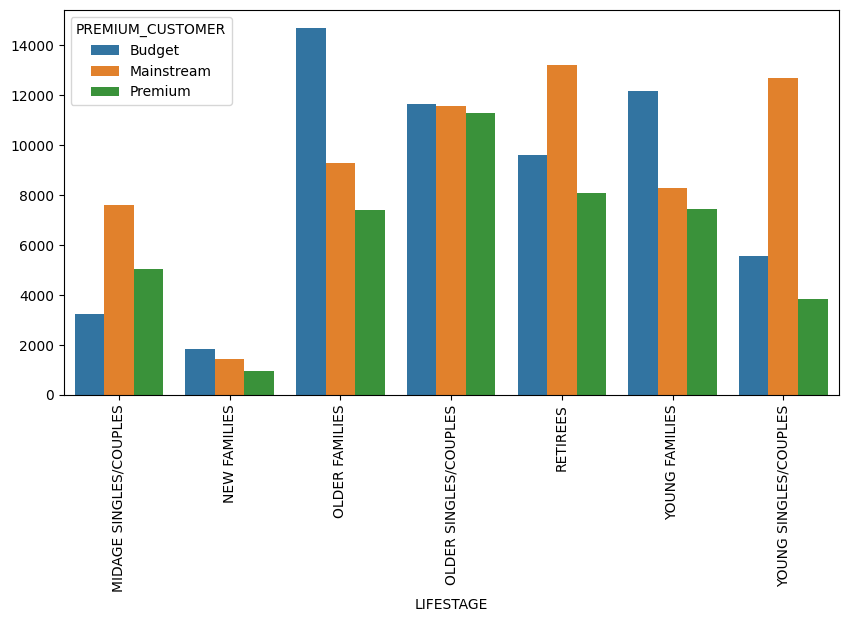

In [136]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.barplot(x=quantity_premium_lifestage.index.get_level_values('LIFESTAGE'),
              y=quantity_premium_lifestage.values,
              hue=quantity_premium_lifestage.index.get_level_values('PREMIUM_CUSTOMER'))

In [137]:
customer=Chips.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg(total_quantity=('PROD_QTY','sum'),
                                                              total_customer=('LYLTY_CARD_NBR','nunique'))
avg_customer=customer['total_quantity']/customer['total_customer']
avg_customer.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Premium           OLDER FAMILIES            4.522589
Mainstream        OLDER FAMILIES            4.394699
Budget            OLDER FAMILIES            4.323217
Premium           YOUNG FAMILIES            4.241005
Budget            YOUNG FAMILIES            4.205740
Mainstream        YOUNG FAMILIES            4.179255
                  OLDER SINGLES/COUPLES     3.468703
Premium           OLDER SINGLES/COUPLES     3.467856
Mainstream        MIDAGE SINGLES/COUPLES    3.438406
Budget            OLDER SINGLES/COUPLES     3.423744
                  MIDAGE SINGLES/COUPLES    3.347107
Premium           MIDAGE SINGLES/COUPLES    3.252903
Budget            RETIREES                  3.221701
Premium           RETIREES                  3.166863
Mainstream        RETIREES                  3.141906
Budget            NEW FAMILIES              2.810107
Mainstream        YOUNG SINGLES/COUPLES     2.806673
                  NEW FAMILIES              2.794175
Premium           NEW FAMILIES              2.732955
                  YOUNG SINGLES/COUPLES     2.718130
Budget            YOUNG SINGLES/COUPLES     2.654859
dtype: float64

In [138]:
Chips.groupby(['PROD_NAME','BRAND'])  ['TOT_SALES'].sum().sort_values(ascending=False)

,,TOT_SALES
PROD_NAME,BRAND,
Dorito Corn Chp Supreme 380g,Doritos,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,Smiths,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,Smiths,34804.2
Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,29021.4
Kettle Tortilla ChpsBtroot&Ricotta 150g,Kettle,27770.2
Kettle Tortilla ChpsFeta&Garlic 150g,Kettle,27627.6
Doritos Corn Chips Cheese Supreme 170g,Doritos,27183.2
Doritos Corn Chips Nacho Cheese 170g,Doritos,26562.8
Tostitos Smoked Chipotle 175g,Tostitos,26474.8


In [139]:
 Brand = Chips['BRAND'].value_counts()

In [140]:
Brand.sort_values(ascending=False)

,count
BRAND,
Doritos,19059
Smiths,16872
Thins,14075
Cobs,9693
Kettle,9580
WW,7443
Natural,6050
Tostitos,3145
French,1418


<Axes: xlabel='BRAND'>

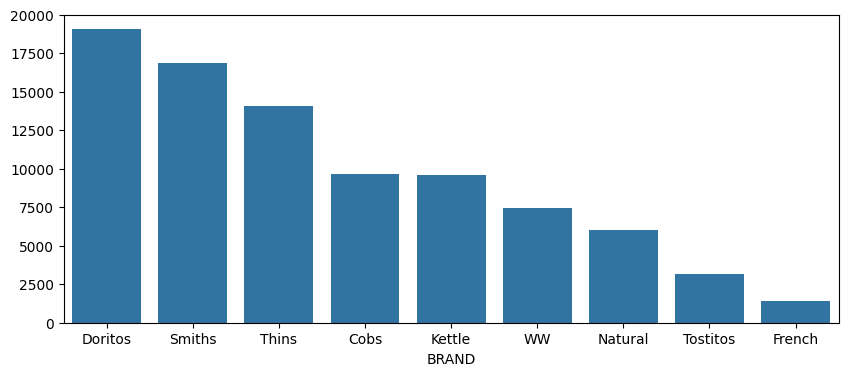

In [141]:
plt.figure(figsize=(10,4))
sns.barplot(x=Brand.index,y=Brand.values)


In [142]:
customer_pkt_size=Chips.groupby(['PKT_SIZE'])['PKT_SIZE'].count()
customer_pkt_size

,PKT_SIZE
PKT_SIZE,
110g,9693
150g,15956
160g,2970
170g,15413
175g,29215
200g,4473
330g,3197
380g,6418


In [143]:
customer_pkt_size=Chips.groupby(['PKT_SIZE'])['PKT_SIZE'].count()
customer_pkt_size

,PKT_SIZE
PKT_SIZE,
110g,9693
150g,15956
160g,2970
170g,15413
175g,29215
200g,4473
330g,3197
380g,6418


In [144]:
pkt_size=Chips['PKT_SIZE'].str.extract(r'(\d+)')
pkt_size.astype(int)
corr=pd.concat([pkt_size,Chips[['PROD_QTY','TOT_SALES']]],axis=1).corr()
corr.rename(columns={0: 'PKT_SIZE'}, index={0: 'PKT_SIZE'}, inplace=True)
corr

,PKT_SIZE,PROD_QTY,TOT_SALES
PKT_SIZE,1.00000,0.013020,0.314660
PROD_QTY,0.01302,1.000000,0.846839
TOT_SALES,0.31466,0.846839,1.000000


<Axes: >

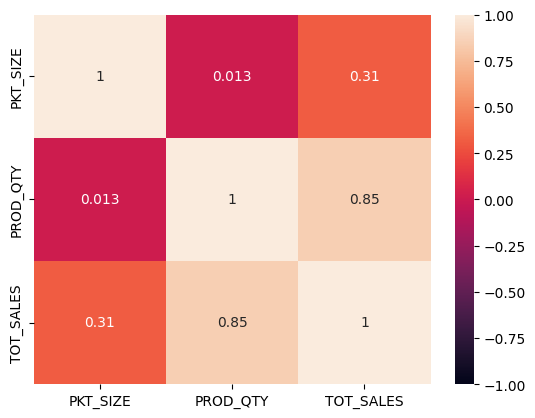

In [145]:
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

In [146]:
Date=Chips.groupby(['DATE'])['TOT_SALES'].sum()
Date

,TOT_SALES
DATE,
2018-06-29,1436.3
2018-06-30,1688.0
2018-07-01,1732.1
2018-07-02,1651.6
2018-07-03,1753.5
...,...
2019-06-24,1618.7
2019-06-25,1507.7
2019-06-26,1968.8


<Figure size 2000x200 with 0 Axes>

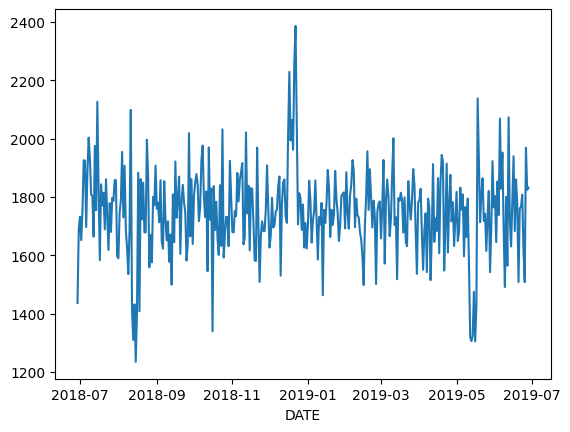

<Figure size 2000x200 with 0 Axes>

In [147]:
sns.lineplot(x=Date.index,y=Date.values)
plt.figure(figsize=(20,2))

In [148]:
december = Chips[Chips['DATE'].dt.month == 12]
december

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PKT_SIZE
265,2018-12-10,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,MIDAGE SINGLES/COUPLES,Budget,Doritos,380g
285,2018-12-22,4,4371,4316,78,Thins Chips Salt & Vinegar 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget,Thins,175g
314,2018-12-03,5,5050,4667,5,Natural Chip Compny SeaSalt175g,2,6.0,MIDAGE SINGLES/COUPLES,Budget,Natural,175g
324,2018-12-26,5,5115,5034,90,Tostitos Smoked Chipotle 175g,2,8.8,MIDAGE SINGLES/COUPLES,Budget,Tostitos,175g
380,2018-12-03,8,8092,7931,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget,Kettle,150g
...,...,...,...,...,...,...,...,...,...,...,...,...
264619,2018-12-17,262,262084,261797,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Premium,Cobs,110g
264644,2018-12-01,264,264351,263136,40,Thins Chips Seasonedchicken 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium,Thins,175g
264723,2018-12-03,266,266364,264204,80,Natural ChipCo Sea Salt & Vinegr 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,175g
264776,2018-12-31,269,269204,266271,79,Smiths Chip Thinly CutSalt/Vinegr175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Smiths,175g


In [149]:
dec_sales=december.groupby(['DATE'])['TOT_SALES'].sum()
dec_sales

,TOT_SALES
DATE,
2018-12-01,1626.3
2018-12-02,1666.8
2018-12-03,1797.1
2018-12-04,1694.8
2018-12-05,1703.0
2018-12-06,1750.5
2018-12-07,1756.4
2018-12-08,1835.2
2018-12-09,1870.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '2018-12-01'),
  Text(1, 0, '2018-12-02'),
  Text(2, 0, '2018-12-03'),
  Text(3, 0, '2018-12-04'),
  Text(4, 0, '2018-12-05'),
  Text(5, 0, '2018-12-06'),
  Text(6, 0, '2018-12-07'),
  Text(7, 0, '2018-12-08'),
  Text(8, 0, '2018-12-09'),
  Text(9, 0, '2018-12-10'),
  Text(10, 0, '2018-12-11'),
  Text(11, 0, '2018-12-12'),
  Text(12, 0, '2018-12-13'),
  Text(13, 0, '2018-12-14'),
  Text(14, 0, '2018-12-15'),
  Text(15, 0, '2018-12-16'),
  Text(16, 0, '2018-12-17'),
  Text(17, 0, '2018-12-18'),
  Text(18, 0, '2018-12-19'),
  Text(19, 0, '2018-12-20'),
  Text(20, 0, '2018-12-21'),
  Text(21, 0, '2018-12-22'),
  Text(22, 0, '2018-12-24'),
  Text(23, 0, '2018-12-25'),
  Text(24, 0, '2018-12-26'),
  Text(25, 0, '2018-12-27'),
  Text(26, 0, '2018-12-28'),
  Text(27, 0, '2018-12-29'),
  Text(28, 0, '2018-12-30')

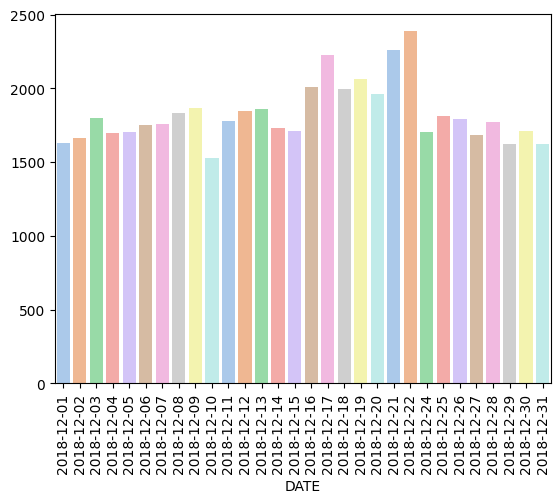

In [150]:
sns.barplot(x=dec_sales.index, y=dec_sales.values,palette = "pastel")
plt.xticks(rotation=90)

In [151]:
Sales_in_month =Chips.groupby([pd.Grouper(key='DATE',freq='M'),'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
Sales_in_month

DATE        PREMIUM_CUSTOMER
2018-06-30  Budget               1111.70
            Mainstream           1203.80
            Premium               808.80
2018-07-31  Budget              19857.90
            Mainstream          21468.30
            Premium             14404.70
2018-08-31  Budget              18275.80
            Mainstream          20498.75
            Premium             13591.40
2018-09-30  Budget              17866.50
            Mainstream          20330.70
            Premium             13807.60
2018-10-31  Budget              19520.70
            Mainstream          21089.40
            Premium             14053.70
2018-11-30  Budget              18540.40
            Mainstream          20125.20
            Premium             13918.60
2018-12-31  Budget              18632.20
            Mainstream          21647.60
            Premium             14519.30
2019-01-31  Budget              18616.90
            Mainstream          21435.60
            Premium             13978.10
2019-02-28  Budget              17179.50
            Mainstream          19025.20
            Premium             12906.80
2019-03-31  Budget              18812.90
            Mainstream          21509.10
            Premium             14068.60
2019-04-30  Budget              18228.10
            Mainstream          19939.70
            Premium             13810.60
2019-05-31  Budget              18076.05
            Mainstream          19814.85
            Premium             14186.85
2019-06-30  Budget              17509.90
            Mainstream          19404.30
            Premium             12583.40
Name: TOT_SALES, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2018-06-30'),
  Text(1, 0, '2018-07-31'),
  Text(2, 0, '2018-08-31'),
  Text(3, 0, '2018-09-30'),
  Text(4, 0, '2018-10-31'),
  Text(5, 0, '2018-11-30'),
  Text(6, 0, '2018-12-31'),
  Text(7, 0, '2019-01-31'),
  Text(8, 0, '2019-02-28'),
  Text(9, 0, '2019-03-31'),
  Text(10, 0, '2019-04-30'),
  Text(11, 0, '2019-05-31'),
  Text(12, 0, '2019-06-30')])

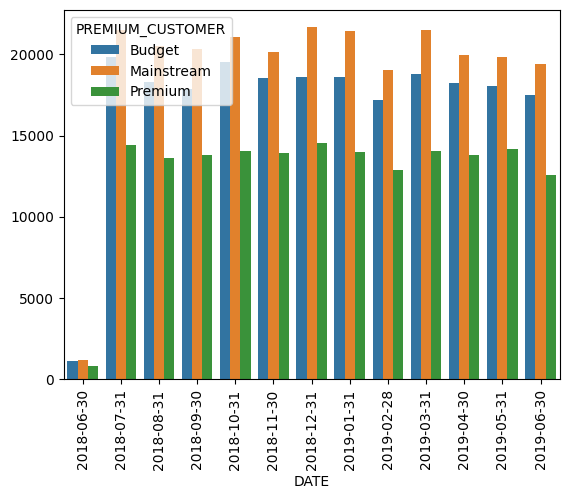

In [152]:
sns.barplot(x=Sales_in_month.index.get_level_values('DATE'),
            y=Sales_in_month.values,
            hue=Sales_in_month.index.get_level_values('PREMIUM_CUSTOMER'))
plt.size=(10,5)
plt.xticks(rotation=90)

In [153]:
lifestage_sales=Chips.groupby([pd.Grouper(key = 'DATE',freq = 'M'),'LIFESTAGE'])['TOT_SALES'].sum()
lifestage_sales

DATE        LIFESTAGE             
2018-06-30  MIDAGE SINGLES/COUPLES      325.7
            NEW FAMILIES                 33.6
            OLDER FAMILIES              527.3
            OLDER SINGLES/COUPLES       683.1
            RETIREES                    641.1
                                       ...   
2019-06-30  OLDER FAMILIES             9218.8
            OLDER SINGLES/COUPLES     10124.9
            RETIREES                   8810.3
            YOUNG FAMILIES             8208.2
            YOUNG SINGLES/COUPLES      6901.9
Name: TOT_SALES, Length: 91, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2018-06-30'),
  Text(1, 0, '2018-07-31'),
  Text(2, 0, '2018-08-31'),
  Text(3, 0, '2018-09-30'),
  Text(4, 0, '2018-10-31'),
  Text(5, 0, '2018-11-30'),
  Text(6, 0, '2018-12-31'),
  Text(7, 0, '2019-01-31'),
  Text(8, 0, '2019-02-28'),
  Text(9, 0, '2019-03-31'),
  Text(10, 0, '2019-04-30'),
  Text(11, 0, '2019-05-31'),
  Text(12, 0, '2019-06-30')])

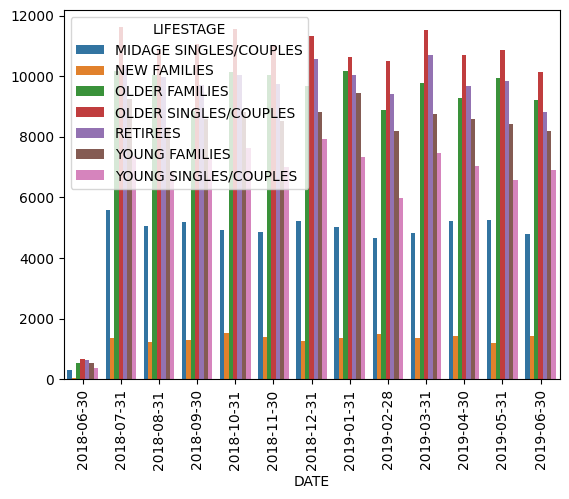

In [154]:
sns.barplot(x=lifestage_sales.index.get_level_values('DATE'),
            y=lifestage_sales.values,
            hue=lifestage_sales.index.get_level_values('LIFESTAGE'))
plt.size=(20,5)
plt.xticks(rotation=90)

In [155]:
Premium_qty=Chips.groupby([pd.Grouper(key = 'DATE',freq = 'M'),'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()


In [156]:
Premium_qty

DATE        PREMIUM_CUSTOMER
2018-06-30  Budget               291
            Mainstream           309
            Premium              209
2018-07-31  Budget              5168
            Mainstream          5631
            Premium             3786
2018-08-31  Budget              4868
            Mainstream          5283
            Premium             3602
2018-09-30  Budget              4743
            Mainstream          5251
            Premium             3634
2018-10-31  Budget              5117
            Mainstream          5471
            Premium             3712
2018-11-30  Budget              4900
            Mainstream          5201
            Premium             3672
2018-12-31  Budget              4987
            Mainstream          5617
            Premium             3789
2019-01-31  Budget              4882
            Mainstream          5523
            Premium             3716
2019-02-28  Budget              4493
            Mainstream          4918
            Premium             3353
2019-03-31  Budget              4996
            Mainstream          5539
            Premium             3743
2019-04-30  Budget              4797
            Mainstream          5204
            Premium             3696
2019-05-31  Budget              4813
            Mainstream          5158
            Premium             3764
2019-06-30  Budget              4673
            Mainstream          5015
            Premium             3340
Name: PROD_QTY, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2018-06-30'),
  Text(1, 0, '2018-07-31'),
  Text(2, 0, '2018-08-31'),
  Text(3, 0, '2018-09-30'),
  Text(4, 0, '2018-10-31'),
  Text(5, 0, '2018-11-30'),
  Text(6, 0, '2018-12-31'),
  Text(7, 0, '2019-01-31'),
  Text(8, 0, '2019-02-28'),
  Text(9, 0, '2019-03-31'),
  Text(10, 0, '2019-04-30'),
  Text(11, 0, '2019-05-31'),
  Text(12, 0, '2019-06-30')])

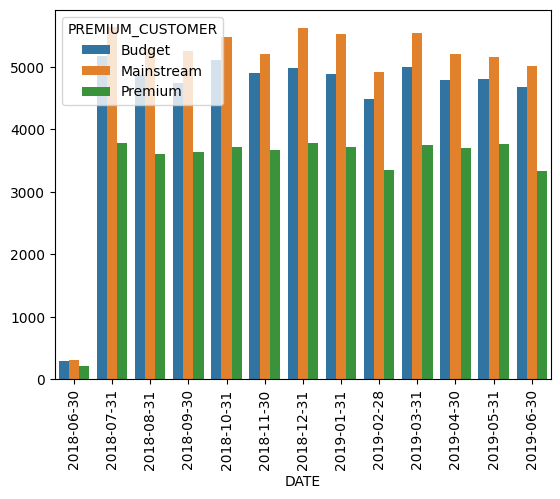

In [157]:
sns.barplot(x=Premium_qty.index.get_level_values('DATE'),
            y=Premium_qty.values,
            hue=Premium_qty.index.get_level_values('PREMIUM_CUSTOMER'))
plt.size=(20,5)
plt.xticks(rotation=90)

In [158]:
lifestage_qty=Chips.groupby([pd.Grouper(key = 'DATE',freq = 'M'),'LIFESTAGE'])['PROD_QTY'].sum()
lifestage_qty

DATE        LIFESTAGE             
2018-06-30  MIDAGE SINGLES/COUPLES      83
            NEW FAMILIES                10
            OLDER FAMILIES             139
            OLDER SINGLES/COUPLES      173
            RETIREES                   165
                                      ... 
2019-06-30  OLDER FAMILIES            2469
            OLDER SINGLES/COUPLES     2669
            RETIREES                  2295
            YOUNG FAMILIES            2184
            YOUNG SINGLES/COUPLES     1778
Name: PROD_QTY, Length: 91, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2018-06-30'),
  Text(1, 0, '2018-07-31'),
  Text(2, 0, '2018-08-31'),
  Text(3, 0, '2018-09-30'),
  Text(4, 0, '2018-10-31'),
  Text(5, 0, '2018-11-30'),
  Text(6, 0, '2018-12-31'),
  Text(7, 0, '2019-01-31'),
  Text(8, 0, '2019-02-28'),
  Text(9, 0, '2019-03-31'),
  Text(10, 0, '2019-04-30'),
  Text(11, 0, '2019-05-31'),
  Text(12, 0, '2019-06-30')])

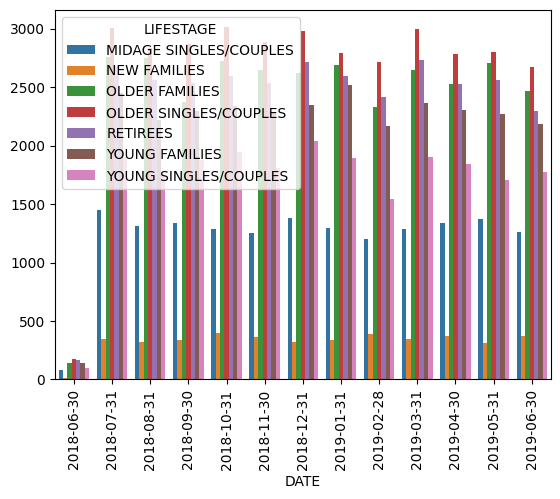

In [159]:
sns.barplot(x=lifestage_qty.index.get_level_values('DATE'),
            y=lifestage_qty.values,
            hue=lifestage_qty.index.get_level_values('LIFESTAGE'))
plt.size=(20,5)
plt.xticks(rotation=90)

In [160]:
Brand_sales=Chips.groupby([pd.Grouper(key = 'DATE',freq ='M'),'BRAND'])['BRAND'].value_counts()
Brand_sales

DATE        BRAND   
2018-06-30  Cobs          44
            Doritos      100
            French         9
            Kettle        48
            Natural       18
                        ... 
2019-06-30  Natural      498
            Smiths      1289
            Thins       1089
            Tostitos     261
            WW           560
Name: count, Length: 117, dtype: int64

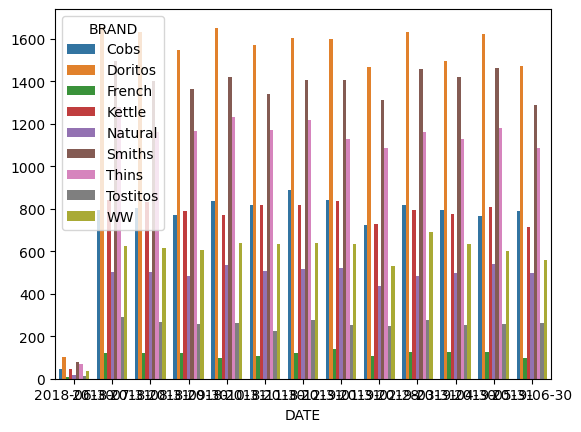

In [161]:
sns.barplot(x=Brand_sales.index.get_level_values('DATE'),
            y=Brand_sales.values,
            hue=Brand_sales.index.get_level_values('BRAND'))
plt.size=(20,5)